In [1]:
import pandas as pd
import mysql.connector

In [2]:
conn = mysql.connector.connect(
    host = 'localhost',
    user = 'root',
    password = ''
    
)

In [16]:
df = pd.read_sql_query("""
SELECT * FROM
(SELECT 
CONCAT("Match - ", ROW_NUMBER() OVER(ORDER BY ID)) AS 'match_no',
SUM(batsman_run) AS 'run_scores',
SUM(SUM(batsman_run)) OVER w AS 'career_runs',
AVG(SUM(batsman_run)) OVER w AS 'career_avg',
AVG(SUM(batsman_run)) OVER(ROWS BETWEEN 25 PRECEDING AND CURRENT ROW) AS 'rolling_avg'

FROM campusx.ipl
WHERE batter = 'V Kohli'
GROUP BY ID
WINDOW w AS (ORDER BY ID ROWS BETWEEN UNBOUNDED PRECEDING AND CURRENT ROW)) t
;
""", conn)

C:\Users\15105\AppData\Local\Temp\ipykernel_13784\1887893304.py:1: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query("""


In [17]:
import matplotlib.pyplot as plt

df.head()

,match_no,run_scores,career_runs,career_avg,rolling_avg
0,Match - 1,1.0,1.0,1.0000,1.0000
1,Match - 2,23.0,24.0,12.0000,12.0000
2,Match - 3,13.0,37.0,12.3333,12.3333
3,Match - 4,12.0,49.0,12.2500,12.2500
4,Match - 5,1.0,50.0,10.0000,10.0000


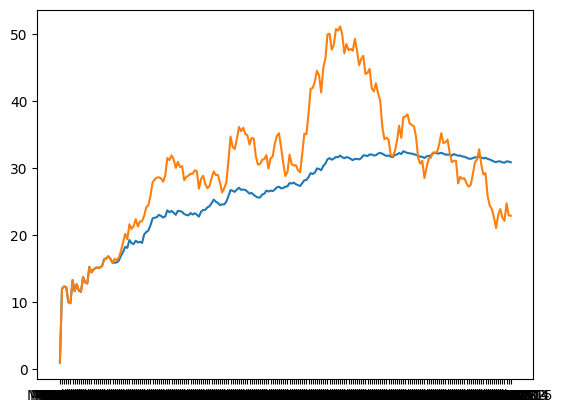

In [18]:
plt.plot(df['match_no'], df['career_avg'])
plt.plot(df['match_no'], df['rolling_avg'])

In [22]:
print(random.randint(3, 9))

8


In [26]:
import numpy as np

# Generate 1216 random numbers and sort them in increasing order
random_numbers = np.sort(np.random.rand(1216))

# Optionally, scale the numbers to a desired range (e.g., 0 to 6 million)
scaled_numbers = random_numbers * 6_000_000

# Convert to integers (if needed)
scaled_numbers = scaled_numbers.astype(int)

# Output
print(type(scaled_numbers))
for i in range(len(scaled_numbers)):
    print(scaled_numbers[i])

<class 'numpy.ndarray'>
233
6220
6821
9496
16457
26859
35660
37001
44283
44899
50729
50928
51151
52557
53491
57743
61860
80904
85323
92679
94865
121281
122368
123695
125321
129216
134391
139890
146268
147989
148359
148997
150621
156476
156755
161766
161813
171459
173711
179631
183781
196839
200140
200584
201918
202853
203154
206001
207798
208551
211336
212142
215395
219364
220205
232305
236618
243290
256969
258841
260683
274833
276131
281107
283954
301606
302236
307272
310062
312573
316082
317861
323451
326576
330872
331987
333455
333577
351402
353306
359637
368201
371227
375257
376090
377768
379643
383704
388707
390606
391603
401798
401808
417751
418944
423522
434833
438646
444737
448628
453457
465626
470084
483281
483328
488845
489091
498412
498784
502867
513984
515745
519937
529442
533580
541731
544293
556284
567260
570308
590141
590426
592062
593068
594717
614676
628610
634709
636027
638320
638800
645821
648626
658711
668483
671835
676035
688741
689109
689729
698536
700180
705123
7